# Data Exploration
*by Aubry d'Andoque on 12/21/19*

## Getting Ready

### Importing Librairies

In [26]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import json

### Importing Data
Data file must be in './data/'

In [3]:
with open('./data/training.txt', 'r') as f :
    testing_set = [] 
    for line in f:
        line = line.split()
        testing_set.append(line)

dataset = pd.DataFrame(testing_set, columns=["Node1","Node2","Edge"])
dataset = dataset.astype(np.int)

## Node File Analysis

In [5]:
dataset.head()

,Node1,Node2,Edge
0,10481,5428,1
1,7353,30328,0
2,8627,3547,1
3,10232,21925,1
4,7110,3288,1


In [6]:
dataset.describe()

,Node1,Node2,Edge
count,453797.000000,453797.000000,453797.000000
mean,12000.018870,13345.006855,0.625000
std,9622.056846,9558.693855,0.484124
min,0.000000,0.000000,0.000000
25%,3711.000000,4866.000000,0.000000
50%,8854.000000,11840.000000,1.000000
75%,19402.000000,21005.000000,1.000000
max,33225.000000,33225.000000,1.000000


### Adjacency Matrix

In [7]:
ind_max_node = int(max(dataset['Node1']))
adjacency_matrix = np.zeros(shape = (ind_max_node,ind_max_node))
for index, row in dataset.iterrows():
    adjacency_matrix[row['Node1']-1,row['Node2']-1] = row['Edge']

In [8]:
plt.imshow(adjacency_matrix, cmap='hot')
plt.show()

KeyboardInterrupt: 

Or as a panda DataFrame

In [4]:
adj_matrix = dataset.pivot('Node1', 'Node2','Edge').fillna(0)

In [3]:
plt.imshow(adj_matrix.value, cmap='hot')
plt.show()

NameError: name 'adj_matrix' is not defined

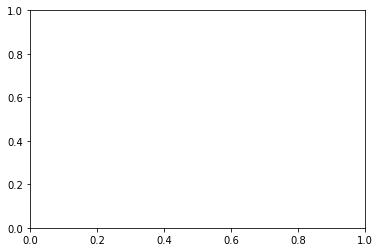

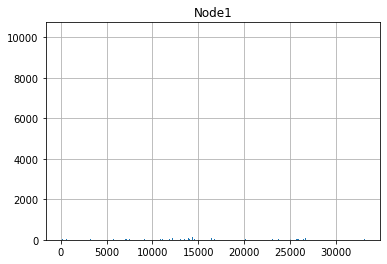

In [11]:
ax = plt.axis(option = 'auto')
hist = dataset.hist(column='Node1' ,bins=int(max(dataset['Node1'])), )

In [43]:
missing_node = []
for node2 in dataset['Node2'].values:
    # Check if the element exists in dataframe values
    if node2 not in dataset['Node1'].values:
        missing_node.append(node2)
print("%s Node2 are not Node1" %s len(missing_node))

[20842, 929, 5537, 20842, 6459, 24421, 16424, 25602, 7956, 32317, 3395, 23115, 4330, 6459, 31142, 32070, 11906, 16764, 17030, 24383, 26886, 32070, 14023, 23201, 2998, 29280, 11218, 16424, 14012, 2475, 18171, 30356, 8607, 18953, 20244, 26893, 17841, 11218, 7956, 15753, 14034, 24383, 11218, 25496, 14012, 19418, 30489, 18171, 28142, 24421, 13010, 929, 28454, 30356, 9485, 6459, 5025, 5517, 9485, 17841, 27938, 26751, 929, 16764, 15488, 32589, 3395, 7956, 27714, 19475, 191, 27714, 13010, 7956, 5776, 32589, 26751, 8607, 32320, 26751, 25121, 18171, 6629, 5246, 14023, 32070, 13038, 284, 22576, 191, 19444, 1830, 23115, 19444, 11218, 19444, 23201, 11218, 18988, 25602, 13539, 28454, 19418, 11906, 24383, 12583, 19418, 17093, 13539, 19418, 5517, 28142, 19567, 11574, 6459, 15488, 32674, 7956, 659, 31141, 7956, 17840, 22576, 32070, 28730, 5517, 19702, 27938, 1830, 18171, 11218, 13539, 18953, 22576, 31558, 28730, 25808, 18953, 659, 12303, 32320, 12583, 32589, 12962, 32589, 19444, 6459, 19567, 13539, 16

In [76]:
data = {'nodes' : [], 'links': []}
nodes = []
max_node = 500
for index, row in dataset.iterrows():
    if(int(row['Node1']) < max_node):
        nodes.append(int(row['Node1']))
        #data['nodes'].append({ "id": int(row['Node1']), "name": int(row['Node1']) })
        if(row['Edge']==1 and int(row['Node2'] < max_node)):
            data['links'].append({ "source": int(row['Node1']), "target": int(row['Node2']) })

In [77]:
nodes.extend(missing_node)
nodes_no_dupl = []
[nodes_no_dupl.append(x) for x in nodes if x not in nodes_no_dupl] 

for node in nodes_no_dupl:
    if node < max_node:
        data['nodes'].append({ "id": int(node), "name": int(node), "occ" : nodes.count(node) })


In [78]:
print(data['nodes'][:20])

[{'id': 227, 'name': 227, 'occ': 1350}, {'id': 51, 'name': 51, 'occ': 1301}, {'id': 383, 'name': 383, 'occ': 17}, {'id': 196, 'name': 196, 'occ': 270}, {'id': 306, 'name': 306, 'occ': 81}, {'id': 148, 'name': 148, 'occ': 984}, {'id': 402, 'name': 402, 'occ': 6}, {'id': 143, 'name': 143, 'occ': 143}, {'id': 142, 'name': 142, 'occ': 181}, {'id': 181, 'name': 181, 'occ': 184}, {'id': 361, 'name': 361, 'occ': 193}, {'id': 59, 'name': 59, 'occ': 16}, {'id': 160, 'name': 160, 'occ': 281}, {'id': 319, 'name': 319, 'occ': 5}, {'id': 256, 'name': 256, 'occ': 470}, {'id': 344, 'name': 344, 'occ': 94}, {'id': 175, 'name': 175, 'occ': 8}, {'id': 32, 'name': 32, 'occ': 6}, {'id': 217, 'name': 217, 'occ': 304}, {'id': 58, 'name': 58, 'occ': 13}]


In [80]:
with open("./data/training.json", "w") as write_file:
    json.dump(data, write_file)

In [68]:
%%HTML
<!DOCTYPE html>
<meta charset="utf-8">

<!-- Load d3.js -->
<script src="https://d3js.org/d3.v4.js"></script>

<!-- Create a div where the graph will take place -->

<body>
    <div id="my_dataviz"></div>
</body>


<script>
    // set the dimensions and margins of the graph
    var margin = {
            top: 10,
            right: 30,
            bottom: 30,
            left: 40
        },
        width = 700 - margin.left - margin.right,
        height = 600 - margin.top - margin.bottom;

    // append the svg object to the body of the page
    var svg = d3.select("#my_dataviz")
        .append("svg")
        .attr("width", width + margin.left + margin.right)
        .attr("height", height + margin.top + margin.bottom)
        .append("g")
        .attr("transform",
            "translate(" + margin.left + "," + margin.top + ")");

    d3.json("./data/training.json", function(data) {

        console.log(data);
        // Initialize the links
        var link = svg
            .selectAll("line")
            .data(data.links)
            .enter()
            .append("line")
            .attr("opacity", 0.5)
            .style("stroke", "#aaa")

        // Initialize the nodes
        var node = svg
            .selectAll("circle")
            .data(data.nodes)
            .enter()
            .append("circle")
            .attr("r", 5)
            .style("fill", "#69b3a2")

        // Let's list the force we wanna apply on the network
        var simulation = d3.forceSimulation(data.nodes) // Force algorithm is applied to data.nodes
            .force("link", d3.forceLink() // This force provides links between nodes
                .id(function(d) {
                    return d.id;
                }) // This provide  the id of a node
                .links(data.links) // and this the list of links
            )
            .force("charge", d3.forceManyBody().strength(-50)) // This adds repulsion between nodes. Play with the -400 for the repulsion strength
            .force("center", d3.forceCenter(width / 2, height / 2)) // This force attracts nodes to the center of the svg area
            .on("end", ticked);

        // This function is run at each iteration of the force algorithm, updating the nodes position.
        function ticked() {
            link
                .attr("x1", function(d) {
                    return d.source.x;
                })
                .attr("y1", function(d) {
                    return d.source.y;
                })
                .attr("x2", function(d) {
                    return d.target.x;
                })
                .attr("y2", function(d) {
                    return d.target.y;
                });

            node
                .attr("cx", function(d) {
                    return d.x + 2;
                })
                .attr("cy", function(d) {
                    return d.y - 2;
                });
        }

    });
</script>

</html>